In [68]:
from keras.backend import clear_session
from keras.layers import Input, Dense
from keras.models import Model
from keras import regularizers
clear_session()

# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# this is our input placeholder
input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(64,  activation='relu')(encoded)
encoded = Dense(encoding_dim, activation='relu')(encoded)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(64,  activation='relu')(encoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(784, activation='sigmoid')(decoded)

# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)
autoencoder.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_3 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_4 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_5 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_6 (Dense)              (None, 784)               1011

In [69]:
encoder = Model(input_img, encoded)
encoder.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_3 (Dense)              (None, 32)                2080      
Total params: 110,816
Trainable params: 110,816
Non-trainable params: 0
_________________________________________________________________


In [70]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

from keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255
x_test  =  x_test.astype('float32') / 255
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test  =  x_test.reshape((len(x_test),  np.prod(x_test.shape[1:])))

print(x_train.shape)
print(x_test.shape)

hist = autoencoder.fit(x_train, x_train, epochs=100, batch_size=256, shuffle=True, validation_data=(x_test,x_test), verbose=1)

(60000, 784)
(10000, 784)
Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 2s 41us/step - loss: 0.2396 - val_loss: 0.1653
Epoch 2/100
60000/60000 [==============================] - 2s 36us/step - loss: 0.1497 - val_loss: 0.1349
Epoch 3/100
60000/60000 [==============================] - 2s 35us/step - loss: 0.1301 - val_loss: 0.1232
Epoch 4/100
60000/60000 [==============================] - 2s 36us/step - loss: 0.1213 - val_loss: 0.1163
Epoch 5/100
60000/60000 [==============================] - 2s 36us/step - loss: 0.1152 - val_loss: 0.1115
Epoch 6/100
60000/60000 [==============================] - 2s 39us/step - loss: 0.1114 - val_loss: 0.1082
Epoch 7/100
60000/60000 [==============================] - 2s 39us/step - loss: 0.1082 - val_loss: 0.1057
Epoch 8/100
60000/60000 [==============================] - 2s 40us/step - loss: 0.1055 - val_loss: 0.1028
Epoch 9/100
60000/60000 [==============================] - 3s 42us/step - lo

Epoch 77/100
60000/60000 [==============================] - 3s 49us/step - loss: 0.0836 - val_loss: 0.0832
Epoch 78/100
60000/60000 [==============================] - 3s 48us/step - loss: 0.0836 - val_loss: 0.0833
Epoch 79/100
60000/60000 [==============================] - 3s 50us/step - loss: 0.0836 - val_loss: 0.0835
Epoch 80/100
60000/60000 [==============================] - 3s 49us/step - loss: 0.0835 - val_loss: 0.0832
Epoch 81/100
60000/60000 [==============================] - 3s 47us/step - loss: 0.0835 - val_loss: 0.0832
Epoch 82/100
60000/60000 [==============================] - 3s 47us/step - loss: 0.0835 - val_loss: 0.0831
Epoch 83/100
60000/60000 [==============================] - 3s 46us/step - loss: 0.0834 - val_loss: 0.0830
Epoch 84/100
60000/60000 [==============================] - 3s 46us/step - loss: 0.0834 - val_loss: 0.0830
Epoch 85/100
60000/60000 [==============================] - 3s 46us/step - loss: 0.0834 - val_loss: 0.0830
Epoch 86/100
60000/60000 [===========

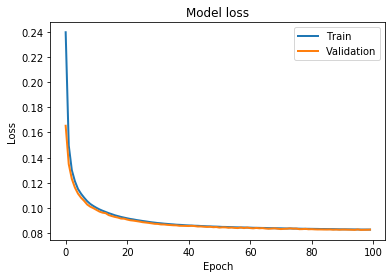

In [71]:
import matplotlib.pyplot as plt

plt.plot(hist.history['loss'], linewidth=2, label='Train')
plt.plot(hist.history['val_loss'], linewidth=2, label='Validation')
plt.legend(loc='upper right')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

In [72]:
# Encode and decode some digits
encoded_imgs = encoder.predict(x_test)
decoded_imgs = autoencoder.predict(x_test)

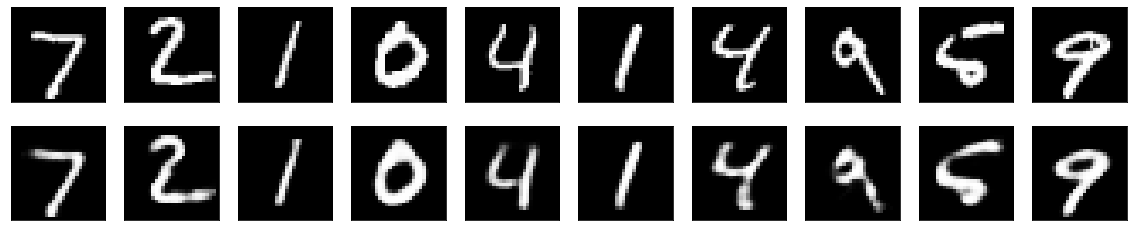

In [73]:
n=10
plt.figure(figsize=(20,4))

for i in range(n):
    ax = plt.subplot(2,n,i+1)
    plt.imshow(x_test[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    ax = plt.subplot(2, n, i+1+n)
    plt.imshow(decoded_imgs[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()